In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [4]:
#get the dataset matrix
def loadDataSet( filename ):
    dataMat = []
    with open(filename, 'rb') as f:
        for line in f:
            nw = list( map(float,line.decode('utf-8').strip().split('\t')) )
            dataMat.append(nw)
    return dataMat


In [5]:
#return the dist of vector A2B
def distVecX2VecY( vecx, vecy ):
    return np.sqrt( np.sum( np.power(vecx-vecy,2) ) )

In [6]:
#calculate the center of each cluster
def calcCent( DataSet, k ):
    rows, cols = DataSet.shape
    initcent = DataSet.take( np.random.choice(80,k), axis = 0 )
    return initcent

In [7]:
'''
    return
        centroids
        cluster_result
'''
def K_Means( DataSet, k, mxitertme = 10 ):
    centroids = calcCent( DataSet, k )
    init_centroids = centroids.copy()
    
    rows, cols = DataSet.shape
    cluster_result = np.mat( np.zeros((rows,2)) )
    #
    cluster_modify = True
    iterct = 0
    
    #print(init_centroids)
    
    while cluster_modify and iterct < mxitertme:
        iterct += 1
        cluster_modify = False
        
        for i in range(rows):
            mnind = 0
            mndist = np.inf
            for j in range(k):
                dist = distVecX2VecY( DataSet[i,:], centroids[j,:] )
                if dist < mndist :
                    mndist = dist
                    mnind = j
            
            if cluster_result[i,0] != mnind :
                cluster_modify = True
            cluster_result[i,:] = mnind, mndist**2
        
        for cent in range(k):
            ptsInCluster = DataSet[np.nonzero(cluster_result[:,0].A == cent)[0]]
            if ptsInCluster.shape[0] > 0:
                centroids[cent, :] = np.mean( ptsInCluster, axis = 0 )
    return centroids, cluster_result, init_centroids

In [8]:
DataMat = np.mat(loadDataSet('data/testSet.txt'))
rows, cols = np.shape(DataMat)
set_k = 4
centroids, cluster_result, init_centroids = K_Means( DataMat, set_k )
clusterCt = np.shape(centroids)[0]
clusterCt

[[-2.579316 -3.497576]
 [-3.567919  1.531611]
 [ 0.972564  2.924086]
 [-2.562539  2.884438]]


4

In [38]:
patterns = [ 'o', 'D', 'P', 's' ]
colors = [ 'b', 'g', 'y', 'black' ]

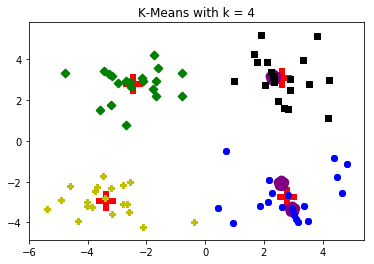

In [58]:
fig = plt.figure()
title = 'K-Means with k = {}'.format(set_k)
ax = fig.add_subplot(111, title = title)
for k in range(clusterCt):
    ax.scatter( centroids[k,0], centroids[k,1], color='r', marker='+', linewidth=20)
    ax.scatter( init_centroids[k,0], init_centroids[k,1], color='purple', marker='*', linewidth=10)
    
    for i in range(cols):
        ptsInCluster = DataMat[np.nonzero(cluster_result[:,0].A==k)[0]]
        ax.scatter( ptsInCluster[:,0].flatten().A[0], ptsInCluster[:,1].flatten().A[0], color=colors[k], marker=patterns[k])